# Import Libraries

In [1]:
# For drive access
from google.colab import drive
drive.mount('/content/drive')

# Standard libraries
import numpy as np
import pandas as pd

# for audio
from IPython.display import Audio
import librosa

# For visualization
import matplotlib.pyplot as plt

Mounted at /content/drive


# Load train data csv file

In [2]:
df = pd.read_csv('/content/drive/MyDrive/project/clean_train_df_w_npy.csv')

df.head()

,primary_label,type,latitude,longitude,rating,filename,duration,country,continent,filename_npy
0,comsan,call,50.7542,4.5672,4.0,comsan/XC587730.ogg,5.746937,BE,EUROPE,comsan/XC587730.npy
1,eaywag1,call,69.3585,88.2378,3.0,eaywag1/XC675944.ogg,5.355000,RU,EUROPE,eaywag1/XC675944.npy
2,comsan,call,41.1698,0.9761,5.0,comsan/XC664012.ogg,10.488000,ES,EUROPE,comsan/XC664012.npy
3,barswa,call,NaN,NaN,2.5,barswa/XC268804.ogg,76.538813,UNKNOWN,UNKNOWN,barswa/XC268804.npy
4,barswa,song,53.9299,-2.9833,2.5,barswa/XC690498.ogg,83.095500,GB,EUROPE,barswa/XC690498.npy


In [3]:
example = np.load('/content/drive/MyDrive/project/train_npy/' + df['filename_npy'].iloc[0])
example

array([-2.3946195e-06, -6.3855114e-06, -1.4239242e-05, ...,
       -7.7737495e-05,  3.6705611e-04, -1.1233051e-04], dtype=float32)

In [4]:
Audio(example, rate=16000)

# define function to visualize

In [11]:
# NOISE
def noise(data):
  noise_amp = np.random.normal(loc=0.0, scale=0.05)*np.amax(data)
  data = data + noise_amp*np.random.normal(size=data.shape[0])
  return data

# STRETCH
def stretch(data, rate=0.8):
  return librosa.effects.time_stretch(y=data, rate=rate)

# SHIFT
def shift(data):
  shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
  return np.roll(data, shift_range)

# PITCH
def pitch(data, sampling_rate=16000, pitch_factor=0.7):
  return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [12]:
noisy = noise(example)
shifted = shift(example)
pitched = pitch(example)
stretched = stretch(example)

In [13]:
display('original', Audio(example, rate=16000))
display('noisy', Audio(noisy, rate=16000))
display('shifted', Audio(shifted, rate=16000))
display('pitched', Audio(pitched, rate=16000))
display('stretched', Audio(stretched, rate=16000))

'original'

'noisy'

'shifted'

'pitched'

'stretched'

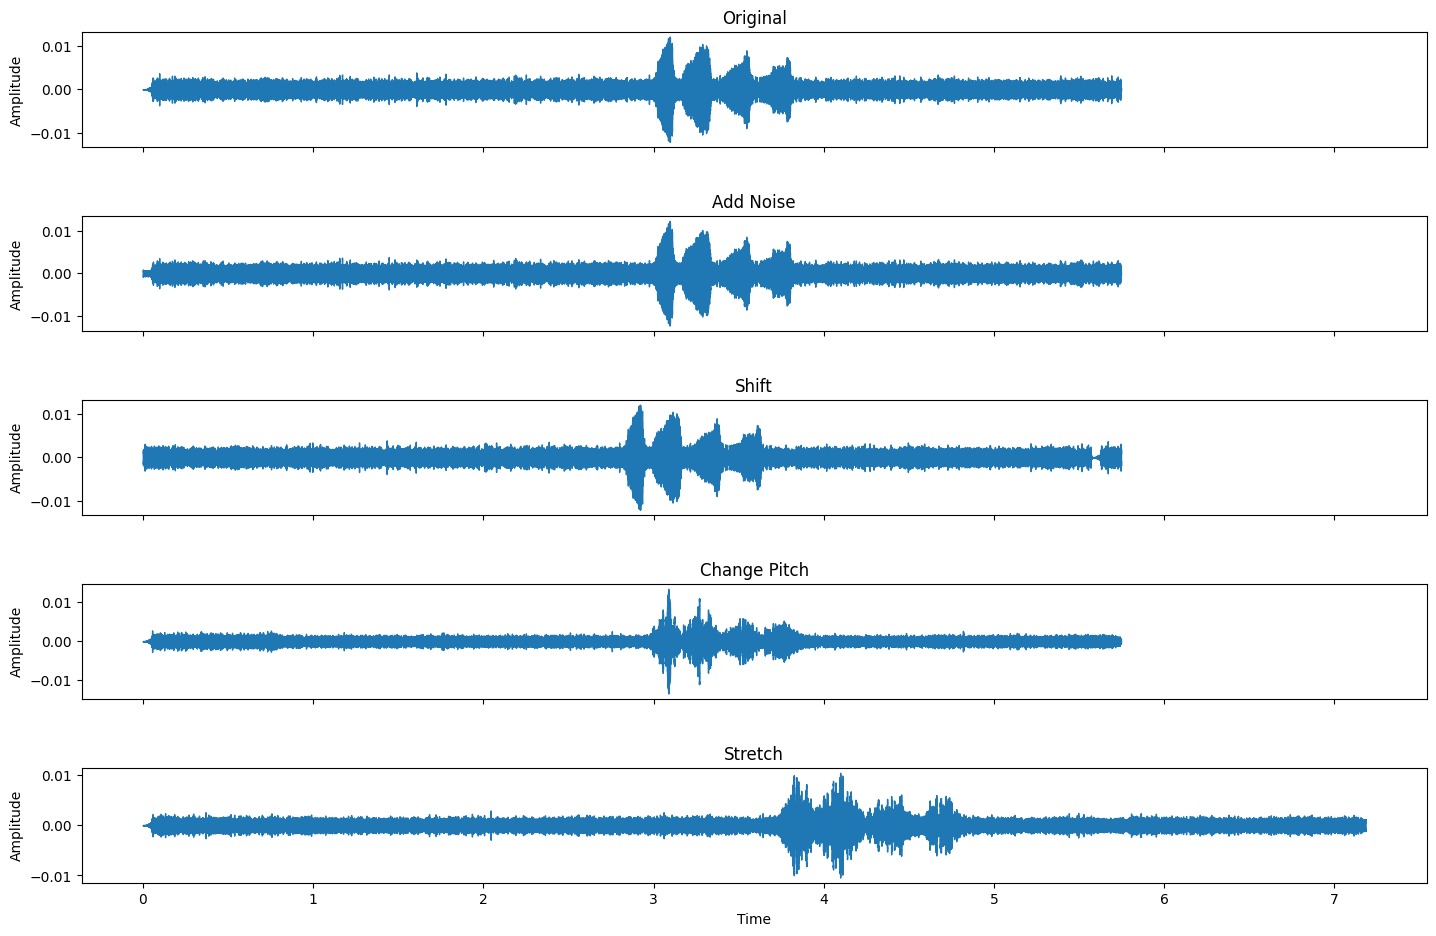

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,10), sharex=True)

librosa.display.waveshow(y=example, sr=16000, ax=axes[0])
axes[0].set_title('Original')
axes[0].set_xlabel('')
axes[0].set_ylabel('Amplitude')

librosa.display.waveshow(y=noisy, sr=16000, ax=axes[1])
axes[1].set_title('Add Noise')
axes[1].set_xlabel('')
axes[1].set_ylabel('Amplitude')

librosa.display.waveshow(y=shifted, sr=16000, ax=axes[2])
axes[2].set_title('Shift')
axes[2].set_xlabel('')
axes[2].set_ylabel('Amplitude')

librosa.display.waveshow(y=pitched, sr=16000, ax=axes[3])
axes[3].set_title('Change Pitch')
axes[3].set_xlabel('')
axes[3].set_ylabel('Amplitude')

librosa.display.waveshow(y=stretched, sr=16000, ax=axes[4])
axes[4].set_title('Stretch')
axes[4].set_ylabel('Amplitude')

fig.tight_layout(pad=3.0)

plt.show()